<img src="https://portafoliodigitalmodelosojcr.weebly.com/uploads/4/8/8/4/48840943/1824297_orig.jpg" align="center"/>

In [1]:
import random as r
import matplotlib.pyplot as plt
import matplotlib.ticker as plt_tick
import numpy as np

## Definición del método Monte Carlo para blackjack

In [2]:
def monte_carlo_blackjack(iterations, deck, initial_game_cards=[], saving_memory=False, ploting=False):
  '''
  Función para hacer una simulación de monte carlo en el caso del juego 
  Blackjack partiendo de una baraja específica

  Parameters
  ----------
  iterations : int
    Número de iteraciones de la simulación
  deck : int array
    Baraja desde la que se va a jugar en cada iteración
  initial_game_cards : int array, optional (default=[])
    Cartas que se tienen en la mano antes de iniciar la simulación
  saving_memory : bool, optional (default=False)
    Bandera que indica si se quieren guardar el número de cartas usado para ganar
    en cada iteración.
    Casos:
      saving memory == True:
        No se guardará el número de cartas utilizado para ganar y la función
        retornará la probabilidad y un arreglo vacío
      saving memory == False:
        Se guarda la cantidad de cartas usadas para ganar y la función retornará
        la probabilidad y este arreglo
        ** Es necesaro que saving_memory sea False para poder ejecutar la 
           secuencia de graficar
  ploting : bool, optional
    Bandera que indica si se desea graficar la distribución de cartas obtenida
  '''
  win_count = 0
  win_game_cards_count = []
  for _ in range(iterations):
    game_cards = initial_game_cards[:]
    game_deck = deck[:]
    while sum(game_cards) < 21:
      card = r.choice(game_deck)
      game_deck.remove(card)
      game_cards.append(card)
    if sum(game_cards) == 21:
      win_count += 1
      if not saving_memory:
        win_game_cards_count.append(len(game_cards))
  if not saving_memory:
    if ploting:
      win_game_cards_unique = list(set(win_game_cards_count))
      win_game_cards_weight = []
      win_game_cards_percentage = []
      win_game_cards_distribution = []
      for n in win_game_cards_unique:
        n_count = win_game_cards_count.count(n)
        win_game_cards_weight.append(n_count)
        win_game_cards_percentage.append('{:.2f}%'.format(n_count*100/len(win_game_cards_count)))
        win_game_cards_distribution.append(float('{:.2f}'.format(n_count/len(win_game_cards_count))))
      chart = plt.bar(win_game_cards_unique, win_game_cards_distribution, alpha=0.5)
      table = plt.table(cellText=[win_game_cards_percentage, win_game_cards_weight],
                        rowLabels=['Porcentaje', 'Cantidad'],
                        colLabels=win_game_cards_unique,
                        loc='bottom')
      plt.subplots_adjust(left=0.2, bottom=0.2)
      plt.xticks([])
      plt.ylabel('Probabilidad de ganar con n cartas')
      plt.show();

      plt.show();
  return win_count/iterations, win_game_cards_count

## Punto 1

In [3]:
# standard decks
std_spanish_deck = [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]
std_poker_deck = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]
print('Mazo español de {} cartas: {}'.format(len(std_spanish_deck), std_spanish_deck))
print('Mazo de poker de {} cartas: {}'.format(len(std_poker_deck), std_poker_deck))

Mazo español de 48 cartas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Mazo de poker de 52 cartas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


### Baraja española

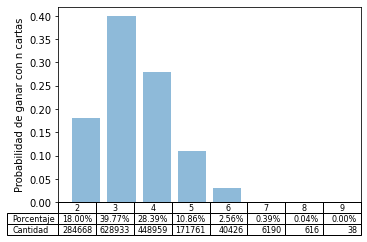

Probabilidad de ganar 0.1581591
El promedio de cartas usadas para ganar 3 (3.415505019945106)


In [4]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, std_spanish_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {} ({})".format(round(sum(win_cards_sum)/len(win_cards_sum)), sum(win_cards_sum)/len(win_cards_sum)))

### Baraja de poker

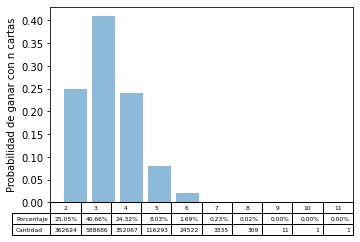

Probabilidad de ganar 0.1447849
El promedio de cartas usadas para ganar 3 (3.2144981969804864)


In [5]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, std_poker_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {} ({})".format(round(sum(win_cards_sum)/len(win_cards_sum)), sum(win_cards_sum)/len(win_cards_sum)))

## Punto 2

In [6]:
# normal weight decks
nrm_spanish_deck = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]
nrm_poker_deck = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

### Baraja española con 3 dieces por palo

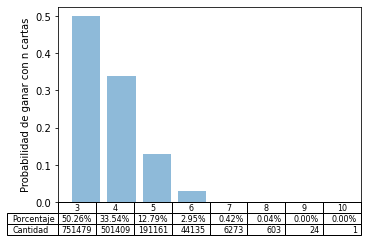

Probabilidad de ganar 0.1495085
El promedio de cartas usadas para ganar 4 (3.6985515873679424)


In [7]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, nrm_spanish_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {} ({})".format(round(sum(win_cards_sum)/len(win_cards_sum)), sum(win_cards_sum)/len(win_cards_sum)))

### Baraja de poker con 4 dieces por palo

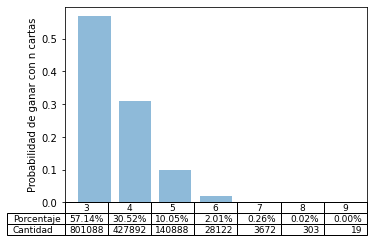

Probabilidad de ganar 0.1401984
El promedio de cartas usadas para ganar 4 (3.578003029991783)


In [8]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, nrm_poker_deck, ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {} ({})".format(round(sum(win_cards_sum)/len(win_cards_sum)), sum(win_cards_sum)/len(win_cards_sum)))

## Punto 3

In [9]:
def custom_deck(base_deck, parts_of_deck=2, hand=[]):
  '''
  Función para generar barajas aleatorias partiendo de una baraja base y un set
  de cartas a ignorar

  Parameters
  ----------
  base_deck : int array
    La baraja desde la cual se generará una nueva
  parts_of_deck : int, optional (default=2)
    Partes en la que se partirá la baraja
  hand: int array (default=[])
    Cartas que no serán tenidas en cuenta al momento de la generación de la
    nueva baraja
  '''
  auxiliar_deck = base_deck[:]
  for card in hand:
    auxiliar_deck.remove(card)
  game_deck = []
  for _ in range(int(len(base_deck)/parts_of_deck)):
    card = r.choice(auxiliar_deck)
    auxiliar_deck.remove(card)
    game_deck.append(card)
  return game_deck

In [10]:
def monte_carlo_blackjack_dynamic_decks(iterations, base_deck, parts_of_deck=2, initial_game_cards=[], saving_memory=False, ploting=False):
  '''
  Función para hacer una simulación de monte carlo en el caso del juego 
  Blackjack en barajas que se generan en cada iteración
  
  Se crea esta función a partir de monte_carlo_blackjack() con la intención de
  que en cada iteración sea un deck distinto buscando que la probabilidad no
  dependa de una baraja previamente creada

  Parameters
  ----------
  iterations : int
    Número de iteraciones de la simulación
  base_deck : int array
    Baraja desde la que se va a generar una nueva usando la función custom_deck()
  parts_of_deck : int, optional (default=2)
    Partes en la que se partirá la baraja base buscando generar una nueva
  initial_game_cards : int array, optional (default=[])
    Cartas que se tienen en la mano antes de iniciar la simulación
  saving_memory : bool, optional (default=False)
    Bandera que indica si se quieren guardar el número de cartas usado para ganar
    en cada iteración.
    Casos:
      saving memory == True:
        No se guardará el número de cartas utilizado para ganar y la función
        retornará la probabilidad y un arreglo vacío
      saving memory == False:
        Se guarda la cantidad de cartas usadas para ganar y la función retornará
        la probabilidad y este arreglo
        ** Es necesaro que saving_memory sea False para poder ejecutar la 
           secuencia de graficar
  ploting : bool, optional
    Bandera que indica si se desea graficar la distribución de cartas obtenida
  '''
  win_count = 0
  win_game_cards_count = []
  for _ in range(iterations):
    game_cards = initial_game_cards[:]
    game_deck = custom_deck(base_deck, parts_of_deck=parts_of_deck, hand=initial_game_cards) # Se crea una nueva baraja
    while sum(game_cards) < 21:
      card = r.choice(game_deck)
      game_deck.remove(card)
      game_cards.append(card)
    if sum(game_cards) == 21:
      win_count += 1
      if not saving_memory:
        win_game_cards_count.append(len(game_cards))
  if not saving_memory:
    if ploting:
      win_game_cards_unique = list(set(win_game_cards_count))
      win_game_cards_weight = []
      win_game_cards_percentage = []
      win_game_cards_distribution = []
      for n in win_game_cards_unique:
        n_count = win_game_cards_count.count(n)
        win_game_cards_weight.append(n_count)
        win_game_cards_percentage.append('{:.2f}%'.format(n_count*100/len(win_game_cards_count)))
        win_game_cards_distribution.append(float('{:.2f}'.format(n_count/len(win_game_cards_count))))
      chart = plt.bar(win_game_cards_unique, win_game_cards_distribution, alpha=0.5)
      table = plt.table(cellText=[win_game_cards_percentage, win_game_cards_weight],
                        rowLabels=['Porcentaje', 'Cantidad'],
                        colLabels=win_game_cards_unique,
                        loc='bottom')
      plt.subplots_adjust(left=0.2, bottom=0.2)
      plt.xticks([])
      plt.ylabel('Probabilidad de ganar con n cartas')
      plt.show();

      plt.show();
  return win_count/iterations, win_game_cards_count

### Mitad de la baraja español de 48 cartas con 3 dieces por palo teniendo en la mano las cartas 7, 7 y 5

In [11]:
spanish_half_deck = custom_deck(nrm_spanish_deck, hand=[7, 7, 5])
print('''Tamaño: {}
Baraja: {}'''.format(len(spanish_half_deck), spanish_half_deck))

Tamaño: 24
Baraja: [2, 2, 6, 1, 10, 6, 10, 10, 9, 3, 9, 7, 5, 1, 10, 3, 10, 10, 2, 8, 10, 10, 3, 5]


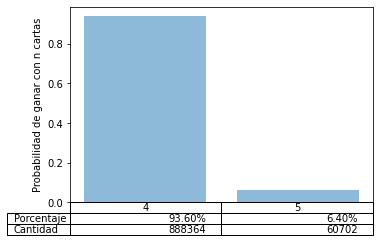

Probabilidad de ganar 0.0949066
El promedio de cartas usadas para ganar 4 (4.063959724613462)


In [12]:
probability, win_cards_sum = monte_carlo_blackjack_dynamic_decks(10000000, base_deck=nrm_spanish_deck, initial_game_cards=[7, 7, 5], ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {} ({})".format(round(sum(win_cards_sum)/len(win_cards_sum)), sum(win_cards_sum)/len(win_cards_sum)))

### Mitad de la baraja de poker de 52 cartas con 4 dieces por palo teniendo en la mano las cartas 7, 7 y 5

In [13]:
poker_half_deck = custom_deck(nrm_poker_deck, hand=[7, 7, 5])
print('''Tamaño: {}
Baraja: {}'''.format(len(poker_half_deck), poker_half_deck))

Tamaño: 26
Baraja: [10, 8, 8, 10, 7, 6, 4, 2, 10, 2, 10, 1, 4, 8, 10, 10, 10, 2, 6, 1, 5, 4, 1, 4, 5, 9]


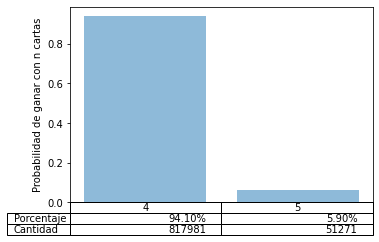

Probabilidad de ganar 0.0869252
El promedio de cartas usadas para ganar 4 (4.0589828956390095)


In [14]:
probability, win_cards_sum = monte_carlo_blackjack_dynamic_decks(10000000, base_deck=nrm_poker_deck, initial_game_cards=[7, 7, 5], ploting=True)
print("Probabilidad de ganar {}".format(probability))
print("El promedio de cartas usadas para ganar {} ({})".format(round(sum(win_cards_sum)/len(win_cards_sum)), sum(win_cards_sum)/len(win_cards_sum)))

## Punto 4

In [15]:
spanish_hot_deck = [1, 1, 1, 1, 2, 2, 2, 2]
poker_hot_deck = [1, 1, 1, 1, 2, 2, 2, 2]
spanish_cold_deck = [8, 8, 8, 8, 9, 9, 9, 9]
poker_cold_deck = [8, 8, 8, 8, 9, 9, 9, 9]

### Baraja española

#### Hot deck

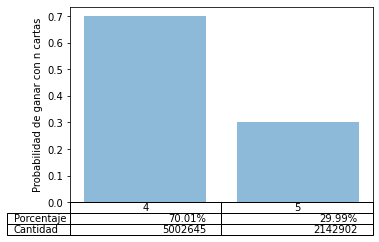

Probabilidad analítica de ganar 0.6875
Probabilidad monte carlo de ganar 0.7145547


In [16]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, spanish_hot_deck, [7, 7, 5], ploting=True)
print("Probabilidad analítica de ganar {}".format((1/2)+((1/2)*(3/8))))
print("Probabilidad monte carlo de ganar {}".format(probability))

In [17]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, spanish_cold_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad analítica de ganar {}".format(0))
print("Probabilidad monte carlo de ganar {}".format(probability))

Probabilidad analítica de ganar 0
Probabilidad monte carlo de ganar 0.0


### Baraja de poker

#### Hot deck

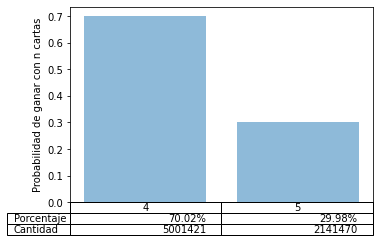

Probabilidad analítica de ganar 0.6875
Probabilidad de ganar 0.7142891


In [18]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, poker_hot_deck, [7, 7, 5], ploting=True)
print("Probabilidad analítica de ganar {}".format((1/2)+((1/2)*(3/8))))
print("Probabilidad de ganar {}".format(probability))

#### Cold deck

In [19]:
probability, win_cards_sum = monte_carlo_blackjack(10000000, poker_cold_deck, [7, 7, 5], saving_memory=True)
print("Probabilidad analítica de ganar {}".format(0))
print("Probabilidad de ganar {}".format(probability))

Probabilidad analítica de ganar 0
Probabilidad de ganar 0.0


## Punto 5

### Spanish deck

In [20]:
balances = []
total_sum_balances = 0 
for i in range (0,10000):
  bet_hot_deck = 1000
  bet_cold_deck = 10
  balance = 0
  for weekend in range (0,600):
    if r.random() <= 0.1:
      balance -= bet_hot_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, spanish_hot_deck, [7,7,5])
      
      if probability == 1:
        #balance += bet_hot_deck*1.5
        balance += bet_hot_deck*2
    else:
      balance -= bet_cold_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, nrm_spanish_deck)

      if probability == 1:
        #balance += bet_cold_deck*1.5
        balance += bet_cold_deck*2
  balances.append(balance)
  total_sum_balances += balance

print('El promedio de los balances obtenidos es: {}'.format(total_sum_balances/len(balances)))
#plt.hist(balances, bins=30)
#plt.show();


El promedio de los balances obtenidos es: 21913.086


### Spanish deck

In [21]:
balances = []
total_sum_balances = 0 
for i in range (0,10000):
  bet_hot_deck = 1000
  bet_cold_deck = 10
  balance = 0
  for weekend in range (0,600):
    if r.random() <= 0.1:
      balance -= bet_hot_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, poker_hot_deck, [7,7,5])
      
      if probability == 1:
        #balance += bet_hot_deck*1.5
        balance += bet_hot_deck*2
    else:
      balance -= bet_cold_deck
      probability, win_cards_sum = monte_carlo_blackjack(1, nrm_poker_deck)

      if probability == 1:
        #balance += bet_cold_deck*1.5
        balance += bet_cold_deck*2
  balances.append(balance)
  total_sum_balances += balance

print('El promedio de los balances obtenidos es: {}'.format(total_sum_balances/len(balances)))

El promedio de los balances obtenidos es: 21872.312
